<a href="https://colab.research.google.com/github/itz-aniket-akm/LABS/blob/main/MOD4_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

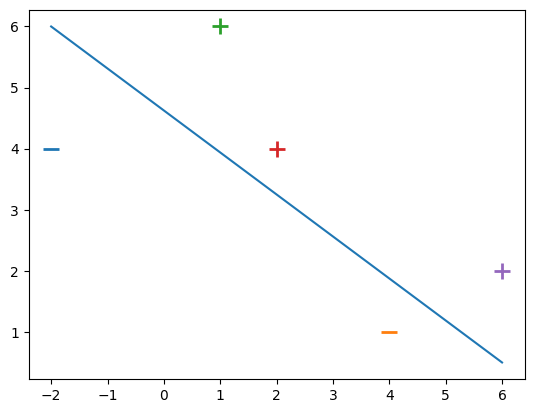

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

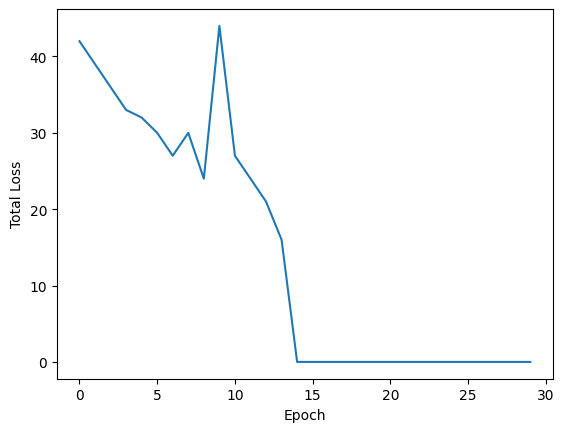

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

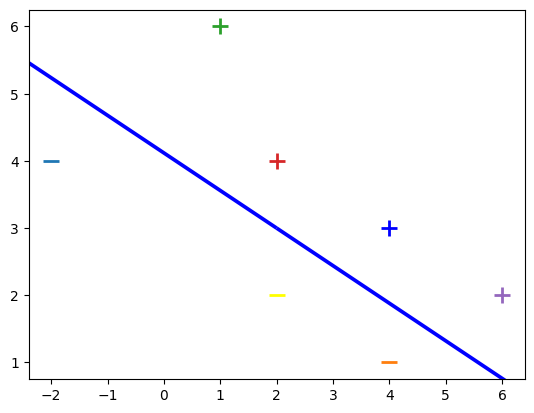

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


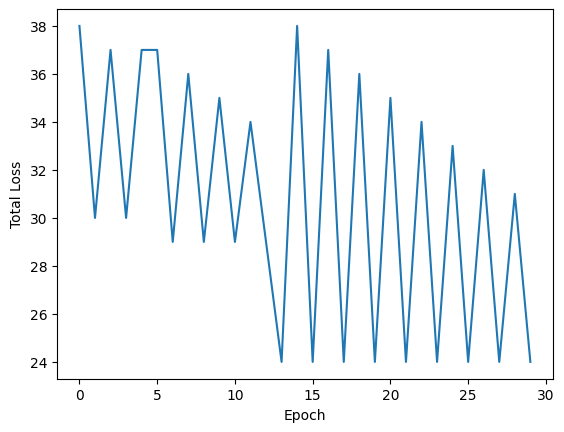

In [ ]:
print(perceptron_algo_plot(X, y))

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



#task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Load the Sonar dataset
sonar = fetch_openml(name='sonar', version=1)
X = sonar.data
y = sonar.target
y = np.where(y == 'R', -1, 1)  # Convert labels to -1 (Rock) and 1 (Mine)

# Add a bias term to X
X = np.c_[X, -np.ones(X.shape[0])]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

learning_rate = 0.1
epochs = 100

# Run the perceptron algorithm
weights, errors = perceptron_algo(X_train, y_train, learning_rate, epochs)

# Plot the error over epochs
plt.plot(range(1, epochs + 1), errors, marker='o')
plt.title('Perceptron Convergence on Sonar Dataset')
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


NameError: ignored

#Task 2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-15-42197723aa88>:17: RuntimeWarning: invalid value encountered in multiply
  weights += update * X[i]


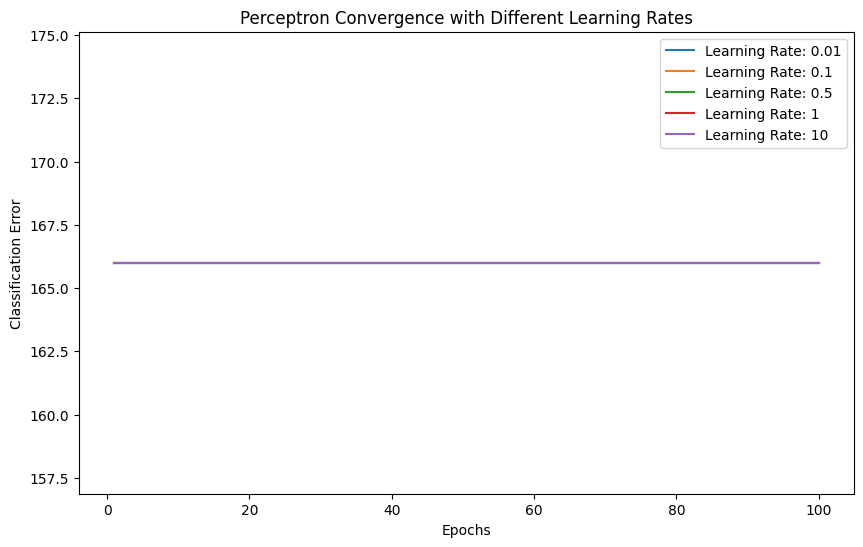

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Define the perceptron algorithm
def perceptron_algorithm(X, y, learning_rate=1, epochs=100):
    weights = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            prediction = np.dot(X[i], weights)
            update = learning_rate * (y[i] - prediction)
            weights += update * X[i]
            total_error += int(update != 0.0)

        errors.append(total_error)

    return weights, errors

# Load the Sonar dataset
sonar = fetch_openml(name='sonar', version=1)
X = sonar.data
y = sonar.target
y = np.where(y == 'R', -1, 1)  # Convert labels to -1 (Rock) and 1 (Mine)

# Add a bias term to X
X = np.c_[X, -np.ones(X.shape[0])]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 0.5, 1, 10]
epochs = 100

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    # Run the perceptron algorithm
    _, errors = perceptron_algorithm(X_train, y_train, learning_rate=lr, epochs=epochs)

    # Plot the error over epochs
    plt.plot(range(1, epochs + 1), errors, label=f'Learning Rate: {lr}')

plt.title('Perceptron Convergence with Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.legend()
plt.show()


#Task 3

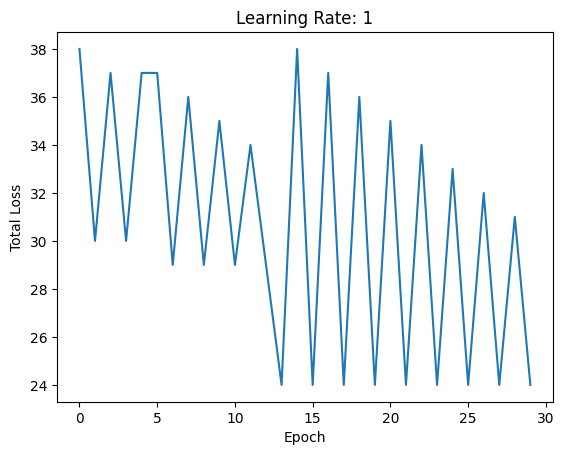

In [ ]:
#3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
X_non_linear = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y_non_linear = np.array([-1, -1, 1, -1, -1])

w_non_linear = perceptron_algo_plot(X_non_linear, y_non_linear)


 **OBSERVATION**:The dataset is deliberately chosen to be non-linearly separable. When you run the perceptron algorithm on such a dataset, you may observe that the algorithm does not converge. Instead, it keeps updating the weights in an attempt to find a hyperplane that separates the classes, but since there is no such hyperplane, the weights may keep oscillating without settling down.
In practice, for non-linearly separable datasets, the perceptron algorithm may not terminate, and the weights may continue to oscillate or diverge. This limitation is one of the reasons why more advanced algorithms like support vector machines (SVMs) or neural networks are often preferred for complex classification tasks.






